In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
df = pd.DataFrame(diab.data, columns=diab.feature_names)
df['target'] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


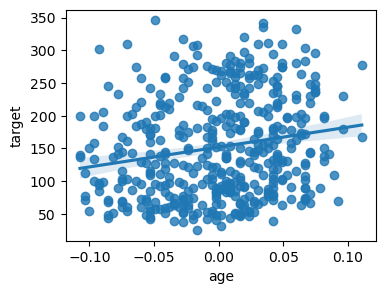

In [8]:
plt.figure(figsize=(4,3))
sns.regplot(x='age', y='target', data=df);

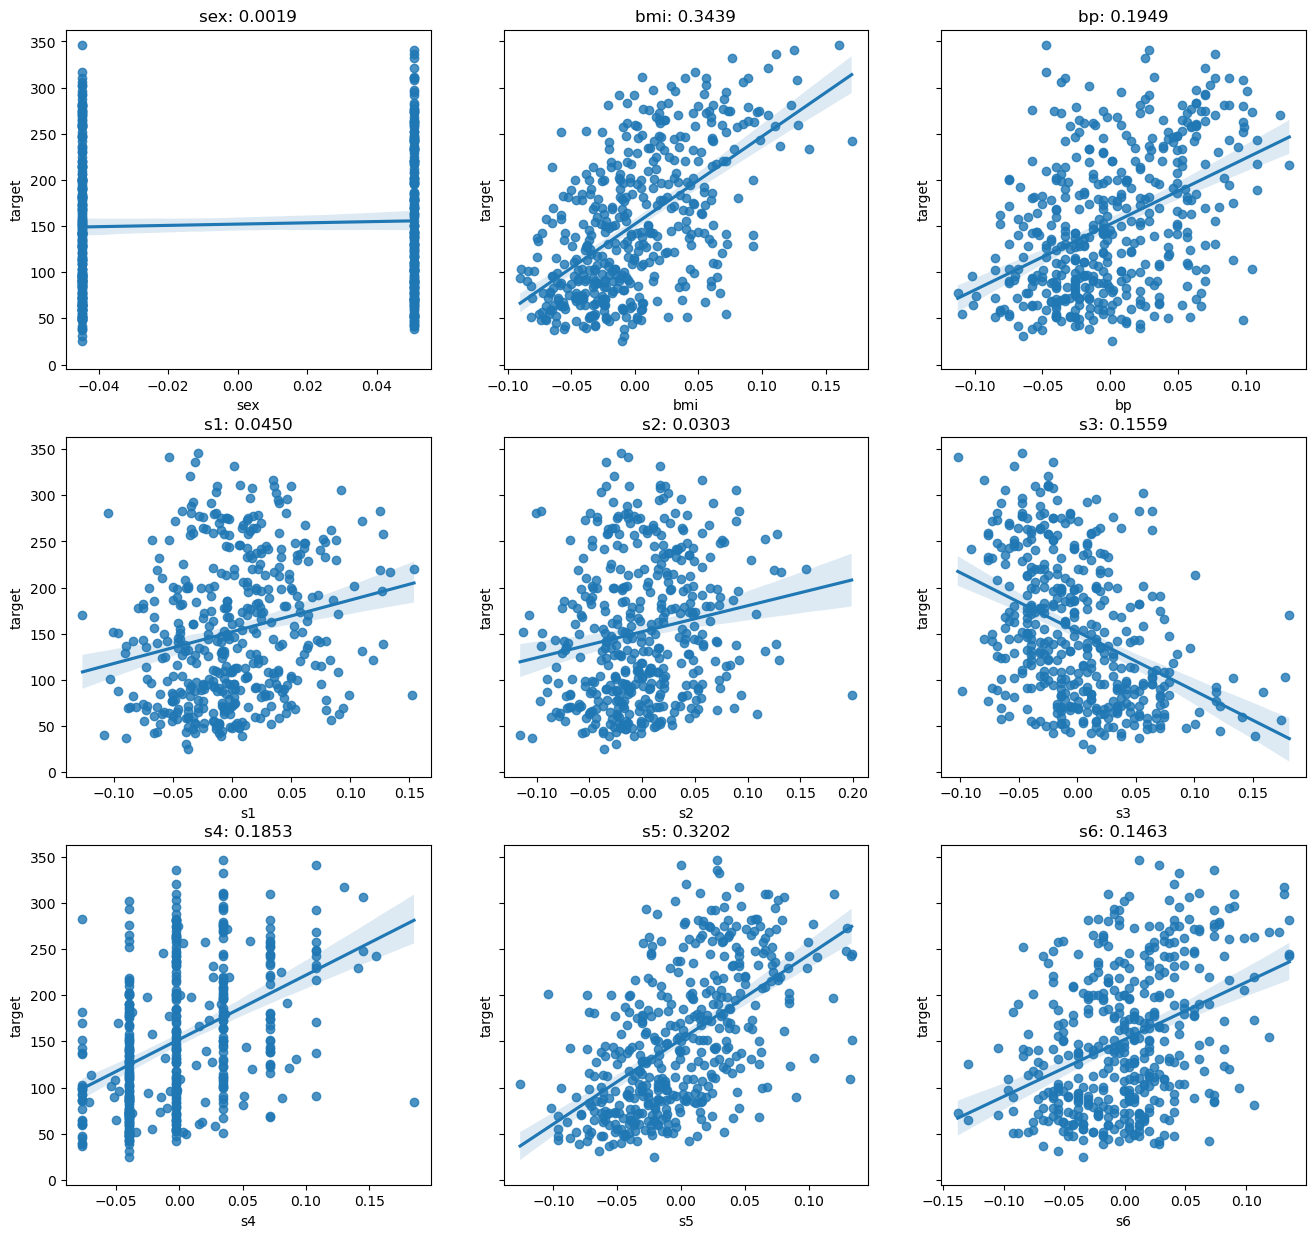

In [12]:
# Feature별 결정 계수와 산점도
from sklearn.linear_model import LinearRegression
fig, axs = plt.subplots(3, 3, figsize=(16,15), sharey=True)
for i, feature in enumerate(df.columns[1:-1]):
    row, col = i // 3, i % 3
    ax=axs[row][col]
    sns.regplot(x=feature, y='target', data=df, ax=ax)
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, df.target.values)
    score = lr.score(X, df.target.values)
    ax.set_title(f'{feature}: {score:.4f}')

In [13]:
# 다중 선형회귀
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.target.values, test_size=0.2, random_state=2023
)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_test, y_test)

0.5011352464069887

In [16]:
# 가중치, 바이어스  (독립변수 (X): 10개, 종속변수 (y):1개 => 가중치 10개, 바이어스 1개 )
lr.coef_, lr.intercept_

(array([ -51.09907508, -243.21502958,  530.16455902,  300.2157454 ,
        -777.36539516,  477.77569494,   78.09493885,  104.01312777,
         772.61888221,   82.60569756]),
 152.0810440491882)

In [17]:
# 실제값
X_test[0], y_test[0]

(array([ 0.0090156 ,  0.05068012,  0.01858372,  0.03908664,  0.01769438,
         0.01058576,  0.019187  , -0.00259226,  0.01630682, -0.01764613]),
 265.0)

In [18]:
# 예측값
np.dot(lr.coef_, X_test[0]) + lr.intercept_

164.5537342245901

In [19]:
# predict() method 사용
y_hat = lr.predict(X_test[0].reshape(1,-1))
y_hat[0]

164.5537342245901

In [20]:
# 10개 테스트 데이터에 적용
y_hat = lr.predict(X_test)
for i in range(10):
    print(f'실제값: {y_test[i]},\t예측값: {y_hat[i]:.2f}')

실제값: 265.0,	예측값: 164.55
실제값: 261.0,	예측값: 230.86
실제값: 160.0,	예측값: 113.39
실제값: 249.0,	예측값: 204.74
실제값: 102.0,	예측값: 105.52
실제값: 200.0,	예측값: 181.94
실제값: 42.0,	예측값: 82.01
실제값: 55.0,	예측값: 80.44
실제값: 178.0,	예측값: 131.11
실제값: 317.0,	예측값: 229.23


In [21]:
# SVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
svr = SVR()
svr.fit(X_train, y_train)
y_hat_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, y_hat_sv)
mse_sv = mean_squared_error(y_test, y_hat_sv)
r2_sv

0.17032539733895213

In [23]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
y_hat_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rf)
mse_rf = mean_squared_error(y_test, y_hat_rf)
r2_rf

0.4054442654406618

In [24]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_hat_xgb = xgbr.predict(X_test)
r2_xgb = r2_score(y_test, y_hat_xgb)
mse_xgb = mean_squared_error(y_test, y_hat_xgb)
r2_xgb

0.394187303430796

In [25]:
# Linear Regression
r2_lr = r2_score(y_test, y_hat)
mse_lr = mean_squared_error(y_test, y_hat)

In [26]:
print('\t\tLR\tSVM\tRF\tXGBoost')
print(f'R Squared\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xgb:.4f}')
print(f'MSE\t\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xgb:.2f}')

		LR	SVM	RF	XGBoost
R Squared	0.5011	0.1703	0.4054	0.3942
MSE		3490.25	5804.72	4159.74	4238.50


In [27]:
rf = pd.DataFrame({
    'y': y_test, 'LR': y_hat, 'SVM': y_hat_sv, 'RF': y_hat_rf, 'XGBoost': y_hat_xgb
})
rf.head(10)

,y,LR,SVM,RF,XGBoost
0,265.0,164.553734,143.763042,193.64,233.700012
1,261.0,230.858516,155.672919,263.64,278.177612
2,160.0,113.389079,127.947072,81.45,83.299362
3,249.0,204.741168,154.991682,151.02,163.872696
4,102.0,105.520336,130.356541,97.71,95.485413
5,200.0,181.943438,144.978071,186.34,164.095291
6,42.0,82.008070,122.085720,91.85,113.813057
7,55.0,80.442006,132.165408,127.36,140.353241
8,178.0,131.113347,132.977523,161.08,153.895767
9,317.0,229.231799,150.773680,193.56,195.394089
